# Exploratory Data Analysis

In [294]:
# The packagtes
import pandas as pd
import numpy as np
import os
import sys
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
# data_path:
data_path = "/Users/davidtbo/Documents/Data_Science/99_Data"

In [296]:
from sklearn.datasets import fetch_openml

# Download the dataset from OpenML
german = fetch_openml(data_id=31, as_frame=True)
df = german.frame

# Display the first rows
df.head()

checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female div/dep/mar          none  ...   
2                       2         male single          none  ...   
3                       2         male single     guarantor  ...   
4                       3         male single          none  ...   

   property_magnitude age  other_payment_plans   housing existing_credits  \
0         real estate  67                 none       own                2   
1         real estate  22                 none       own                1   
2         real estate  49                 none       own                1   
3      life insurance  45                 none  for free                1   
4   no known property  53                 none  for free                2   

                  job num_dependents  own_telephone foreign_worker class  
0             skilled              1            yes            yes  good  
1             skilled              1           none            yes   bad  
2  unskilled resident              2           none            yes  good  
3             skilled              2           none            yes  good  
4             skilled              2           none            yes   bad  

[5 rows x 21 columns]

In [297]:
# Keep a copy of the initial dataset
file_name = "german_credit.csv"
if os.path.isfile(file_name):
    print(f"File {file_name} already exists.")
else:
    # Save the dataset to a CSV file
    df.to_csv(file_name, index=False)
    print(f"File {file_name} created.")

File german_credit.csv already exists.


# First Data Exploration and Quality Check

In [298]:
data = df.copy()
data.head(2)

checking_status  duration                  credit_history   purpose  \
0              <0         6  critical/other existing credit  radio/tv   
1        0<=X<200        48                   existing paid  radio/tv   

   credit_amount    savings_status employment  installment_commitment  \
0           1169  no known savings        >=7                       4   
1           5951              <100     1<=X<4                       2   

      personal_status other_parties  ...  property_magnitude age  \
0         male single          none  ...         real estate  67   
1  female div/dep/mar          none  ...         real estate  22   

   other_payment_plans housing existing_credits      job num_dependents  \
0                 none     own                2  skilled              1   
1                 none     own                1  skilled              1   

   own_telephone foreign_worker class  
0            yes            yes  good  
1           none            yes   bad  

[2 rows x 21 columns]

In [299]:
# Types and missing number of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [300]:
#¬†check duplicates
duplicates = data.duplicated().sum()
print(duplicates)

0


In [301]:
# describe the data
data.describe()

duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000          1.000000        1.000000  
50%      33.000000          1.000000        1.000000  
75%      42.000000          2.000000        1.000000  
max      75.000000          4.000000        2.000000

## Missing analysis

In [302]:
# check missing values
missing_values = data.isnull().mean()
print(missing_values[missing_values > 0])

Series([], dtype: float64)


## Outliers analysis

In [303]:
data.head()

checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                       4         male single          none  ...   
1                       2  female div/dep/mar          none  ...   
2                       2         male single          none  ...   
3                       2         male single     guarantor  ...   
4                       3         male single          none  ...   

   property_magnitude age  other_payment_plans   housing existing_credits  \
0         real estate  67                 none       own                2   
1         real estate  22                 none       own                1   
2         real estate  49                 none       own                1   
3      life insurance  45                 none  for free                1   
4   no known property  53                 none  for free                2   

                  job num_dependents  own_telephone foreign_worker class  
0             skilled              1            yes            yes  good  
1             skilled              1           none            yes   bad  
2  unskilled resident              2           none            yes  good  
3             skilled              2           none            yes  good  
4             skilled              2           none            yes   bad  

[5 rows x 21 columns]

In [304]:
import seaborn as sns
from sklearn.ensemble import IsolationForest

We will store the outliers into a dictionary

In [305]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

def detect_outliers(df, contamination=0.05, z_thresh=3):
    """
    Detects outliers in a DataFrame using IQR, Z-score, and Isolation Forest methods.

    Parameters:
    - df: pd.DataFrame ‚Äî Input dataset.
    - contamination: float ‚Äî Proportion of outliers for Isolation Forest.
    - z_thresh: float ‚Äî Z-score threshold (default is 3).

    Returns:
    - outliers: dict ‚Äî Dictionary with methods as keys and dict of outlier indices per column.
    """
    outliers = {'IQR': {}, 'Z-score': {}, 'IsolationForest': {}}

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # IQR method
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_idx = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers['IQR'][col] = outlier_idx

    # Z-score method
    for col in numeric_cols:
        mean = df[col].mean()
        std = df[col].std()
        z_scores = (df[col] - mean) / std
        outliers['Z-score'][col] = df.index[np.abs(z_scores) > z_thresh]

    # Isolation Forest method
    for col in numeric_cols:
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        preds = iso_forest.fit_predict(df[[col]])
        outliers_idx = df[[col]][preds == -1].index
        outliers['IsolationForest'][col] = outliers_idx

    return outliers


In [306]:
outliers = detect_outliers(data)

In [307]:
# outliers

Outliers report

In [308]:
import pandas as pd
from scipy.stats import ks_2samp

def analyze_outliers_summary(df, outliers_dict):
    """
    Analyzes outliers by computing counts, percentages, and assessing whether
    their removal significantly affects the distribution of each variable 
    using the Kolmogorov‚ÄìSmirnov test.

    Parameters:
    - df: pd.DataFrame ‚Äî Original dataset
    - outliers_dict: dict ‚Äî Dictionary of outlier indices by method and column
    
    Returns:
    - final_outlier_df: pd.DataFrame ‚Äî Summary table with:
        - count of outliers
        - percentage of outliers
        - distribution change indicator ('signif.different' or 'similar')
    """
    n_rows = df.shape[0]  # Total number of rows in the dataset

    # Step 1: Count number of outliers per method and column
    outlier_counts = pd.DataFrame({
        method: {col: len(indices) for col, indices in cols.items()}
        for method, cols in outliers_dict.items()
    })

    # Step 2: Compute the percentage of outliers
    outlier_percentages = outlier_counts.apply(lambda x: (x / n_rows) * 100)

    # Step 3: Rename columns to indicate count and percentage
    outlier_counts.columns = [f"{col} (count)" for col in outlier_counts.columns]
    outlier_percentages.columns = [f"{col} (%)" for col in outlier_percentages.columns]

    # Step 4: Use KS test to determine if removing outliers significantly alters the distribution
    distribution_diffs = {}
    for method, cols in outliers_dict.items():
        diffs = {}
        for col, indices in cols.items():
            # Values with outliers included
            with_outliers = df[col].dropna()
            # Values with outliers removed
            without_outliers = df.drop(index=indices)[col].dropna()

            # Kolmogorov‚ÄìSmirnov test
            ks_stat, p_value = ks_2samp(with_outliers, without_outliers)

            # Label distribution change as significant or not
            label = 'signif.different' if p_value < 0.05 else 'similar'
            diffs[col] = label

        # Store distribution results for this method
        distribution_diffs[f"{method} (distrib. w or w/o)"] = pd.Series(diffs)

    # Step 5: Build final DataFrame combining counts, percentages, and KS test results
    distribution_diff_df = pd.DataFrame(distribution_diffs)
    final_outlier_df = pd.concat([outlier_counts, outlier_percentages, distribution_diff_df], axis=1)

    return final_outlier_df

In [309]:
summary_df = analyze_outliers_summary(data, outliers)
summary_df

IQR (count)  Z-score (count)  IsolationForest (count)  \
duration                         70               14                       49   
credit_amount                    72               25                       50   
installment_commitment            0                0                        0   
residence_since                   0                0                        0   
age                              23                7                       44   
existing_credits                  6                6                       34   
num_dependents                  155                0                        0   

                        IQR (%)  Z-score (%)  IsolationForest (%)  \
duration                    7.0          1.4                  4.9   
credit_amount               7.2          2.5                  5.0   
installment_commitment      0.0          0.0                  0.0   
residence_since             0.0          0.0                  0.0   
age                         2.3          0.7                  4.4   
existing_credits            0.6          0.6                  3.4   
num_dependents             15.5          0.0                  0.0   

                       IQR (distrib. w or w/o) Z-score (distrib. w or w/o)  \
duration                      signif.different                     similar   
credit_amount                 signif.different                     similar   
installment_commitment                 similar                     similar   
residence_since                        similar                     similar   
age                                    similar                     similar   
existing_credits                       similar                     similar   
num_dependents                signif.different                     similar   

                       IsolationForest (distrib. w or w/o)  
duration                                           similar  
credit_amount                                      similar  
installment_commitment                             similar  
residence_since                                    similar  
age                                                similar  
existing_credits                                   similar  
num_dependents                                     similar

Explaination the outliers

Mitigation the outliers

In [310]:
def count_rows_to_remove_extended(outliers_dict, total_rows):
    """
    Returns a DataFrame with the number of unique rows that would be removed
    for each outlier detection method, and for the union of all methods.
    
    Parameters:
    - outliers_dict: dict ‚Äî Format like {'IQR': {'col1': [indices], ...}, ...}
    - total_rows: int ‚Äî Total number of rows in the dataset
    
    Returns:
    - pd.DataFrame with counts and percentages of rows to remove
    """
    results = {}
    all_combined_indices = set()

    for method, columns in outliers_dict.items():
        method_indices = set()
        for indices in columns.values():
            method_indices.update(indices)
        all_combined_indices.update(method_indices)

        results[method] = {
            'rows_to_remove': len(method_indices),
            'percentage': (len(method_indices) / total_rows) * 100
        }

    # Add combined results across all methods
    results['All methods combined'] = {
        'rows_to_remove': len(all_combined_indices),
        'percentage': (len(all_combined_indices) / total_rows) * 100
    }

    return pd.DataFrame(results).T  # Transpose to have methods as rows

In [311]:
result = count_rows_to_remove_extended(outliers, total_rows=data.shape[0])
print(result)

                      rows_to_remove  percentage
IQR                            272.0        27.2
Z-score                         48.0         4.8
IsolationForest                155.0        15.5
All methods combined           324.0        32.4


If we consider a rule of thumb of maximum 5% of rows to be deleted for outliers, then Z-score could be a solution.  

But the distributions with or without outliers using Z-score are not significantly different.  

So our strategy will be to replace the outliers by the median.

In [312]:
def replace_outliers(data, outliers_dict, method="mean"):
    """
    Replaces outliers in a DataFrame based on given indices.
    
    Parameters:
    - data: pd.DataFrame ‚Äî The original dataset.
    - outliers_dict: dict ‚Äî A dictionary like {'IQR': {'col1': [indices], ...}, ...}
    - method: str ‚Äî Replacement method: "mean" or "median".
    
    Returns:
    - A copy of the DataFrame with outliers replaced.
    """
    if method not in ['mean', 'median']:
        raise ValueError("Method must be 'mean' or 'median'")
    
    # Make a copy of the DataFrame
    df_cleaned = data.copy()
    
    for method_name, cols in outliers_dict.items():
        for col, indices in cols.items():
            if col not in df_cleaned.columns:
                continue  # Skip unknown columns
            
            # Choose replacement value
            if method == "mean":
                replacement_value = df_cleaned[col].mean()
            else:  # method == "median"
                replacement_value = df_cleaned[col].median()
            
            # Replace outlier values at specified indices
            df_cleaned.loc[indices, col] = replacement_value
    
    return df_cleaned

In [313]:
# Replace outliers detected by IQR with the median
cleaned_data = replace_outliers(data, {'IQR': outliers['IQR']}, method="median")

Outliers report

When replacing detected outliers using the IQR with a value such as the median, the distribution changes, so the values of Q1, Q3, and the IQR evolve.  
Re-running the detection can reveal new outliers, even if the previous ones have been 'corrected.' This can create a looping effect.

**Best practices:**

1. Single pass of detection + replacement  
üß© Recommended if you want to keep a simple and interpretable method

You perform a single detection with IQR
You replace the outliers (e.g., with the median)
You do not perform detection again afterwards  
‚úÖ Advantages:
Fast, simple
Maintains interpretable logic  

‚ùó Disadvantage:
Does not correct new 'residual outliers'"

2. Controlled Iteration with Convergence Threshold  
üß© Recommended if you want more precision without going to infinity

You perform an initial detection and replacement  
You rerun the detection  
You stop when no more new outliers are detected (or very few, e.g., < 1% of the dataset)

üß© Recommended to completely avoid the IQR problem  

Methods such as:  

Isolation Forest (more robust because it is non-parametric)  
Local Outlier Factor  
Robust Z-scores (using median and MAD instead of mean/standard deviation)  

üí° These methods are less sensitive to the cascading effect.

üß† In Summary

| Approach                | When to Use                              |
|-------------------------|------------------------------------------|
| Single Pass             | Simple cases, interpretability           |
| Controlled Iterations   | You want to refine without an infinite loop |
| Alternative Robust Method | You want to completely avoid recalculation |

In [314]:
# # 2. Controlled iteration with convergence threshold
# max_iterations = 5
# threshold = 0.01  # Stop if less than 1% new outliers
# previous_outliers = set()

# for i in range(max_iterations):
#     outliers_iqr = detect_outliers(df, method='IQR')  # Suppose it returns a set of indices
#     current_outliers = set.union(*[set(idxs) for idxs in outliers_iqr['IQR'].values()])
    
#     # Check if new outliers are substantially different
#     new_outliers = current_outliers - previous_outliers
#     if len(new_outliers) / len(df) < threshold:
#         break

#     df = replace_outliers(df, {'IQR': outliers_iqr['IQR']}, method='median')
#     previous_outliers = current_outliers

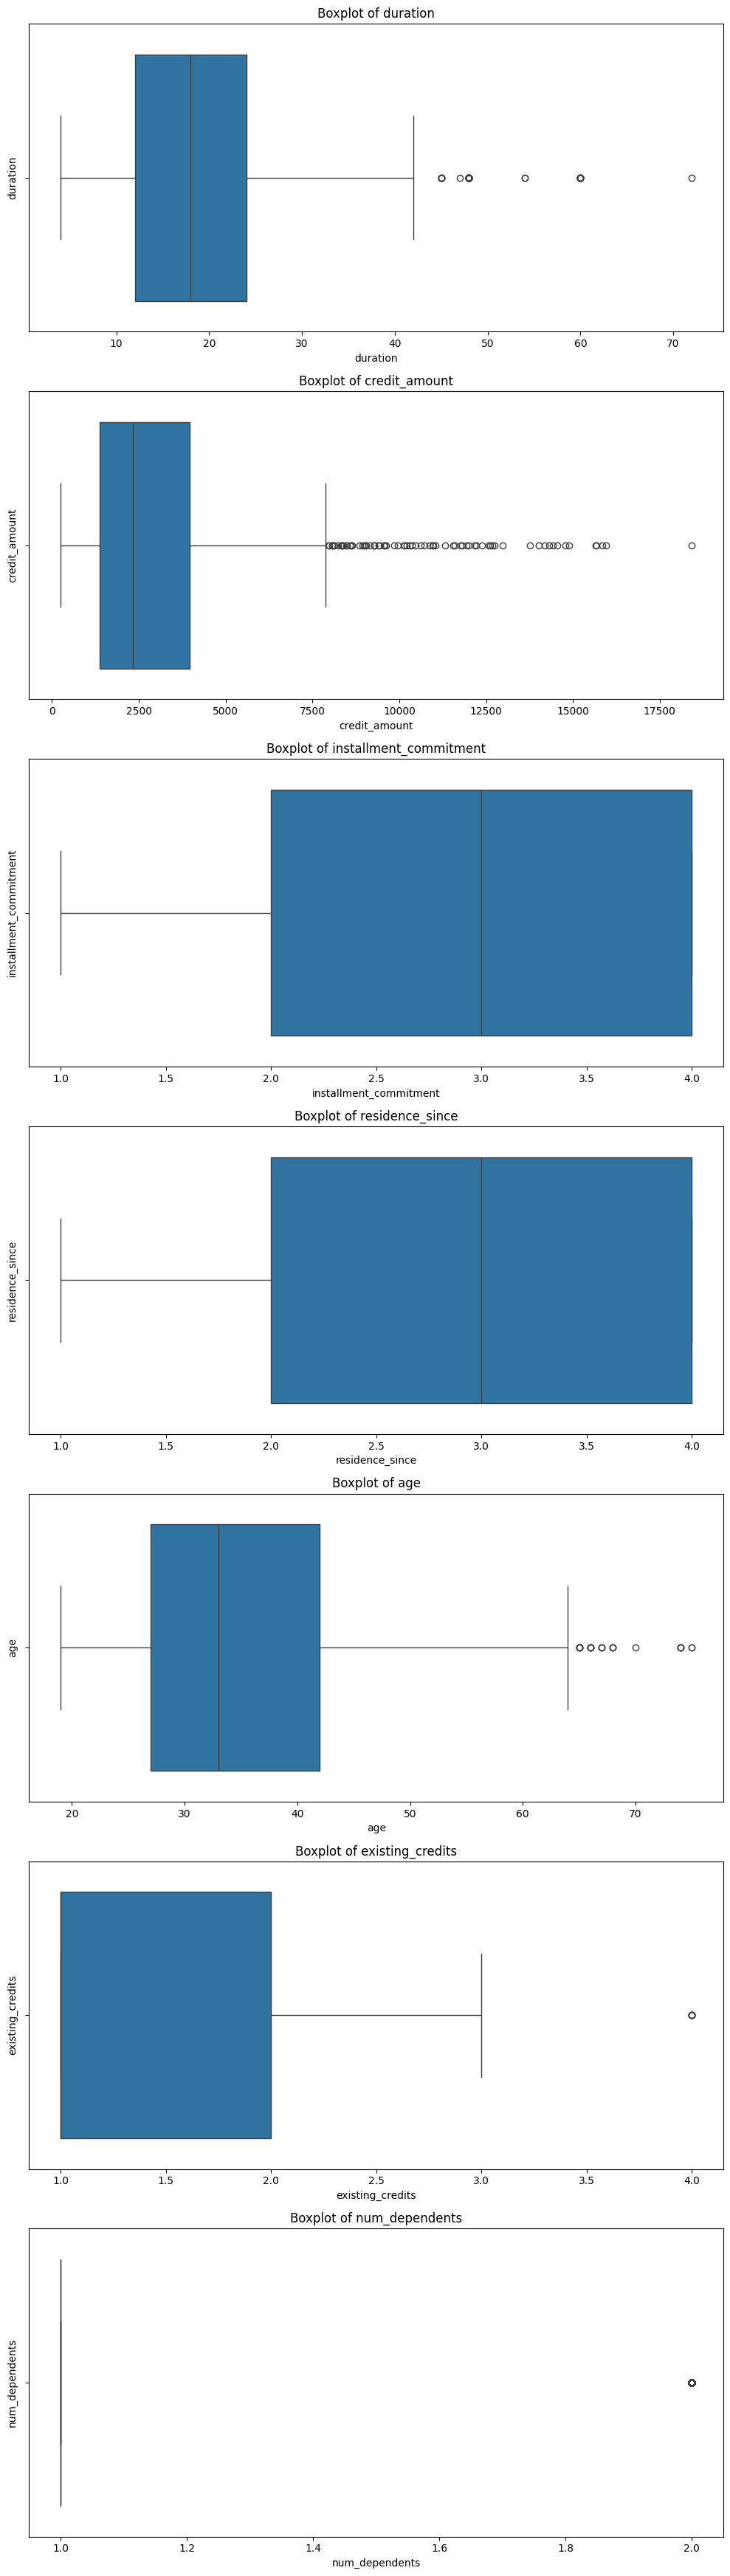

In [315]:
# select only the numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create a subplot for eacth numeric column
num_vars = len(numeric_cols)
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(10, 5 * num_vars))
# Create boxplots for each numeric column
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")
    ax.set_ylabel(col)
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

In [316]:
data.dtypes

checking_status           category
duration                     int64
credit_history            category
purpose                   category
credit_amount                int64
savings_status            category
employment                category
installment_commitment       int64
personal_status           category
other_parties             category
residence_since              int64
property_magnitude        category
age                          int64
other_payment_plans       category
housing                   category
existing_credits             int64
job                       category
num_dependents               int64
own_telephone             category
foreign_worker            category
class                     category
dtype: object

In [317]:
# categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"Column '{col}' has {data[col].nunique()} unique values.")
    print(data[col].value_counts())
    print("-" * 50)
    print("\n")

## Univariate analysis

Variance analysis

In [318]:
from sklearn.feature_selection import VarianceThreshold

df_float = data.select_dtypes(include=['float64', 'int64'])
# Variance threshold
selector = VarianceThreshold(threshold=0.01)
# Fit the selector to the data
selector.fit(df_float)
# Get the columns that are kept
selected_columns = df_float.columns[selector.get_support()]
# Get the variance of each column
variances = selector.variances_
# Create a DataFrame to display the variances
variance_df = pd.DataFrame({'Column': df_float.columns, 'Variance': variances})
variance_df = variance_df.sort_values(by='Variance', ascending=False)
# Display the DataFrame
variance_df = variance_df[variance_df['Variance'] > 0.01]
low_variance_df = variance_df[variance_df['Variance'] < 0.01]
print(low_variance_df)

Empty DataFrame
Columns: [Column, Variance]
Index: []


Boxplots

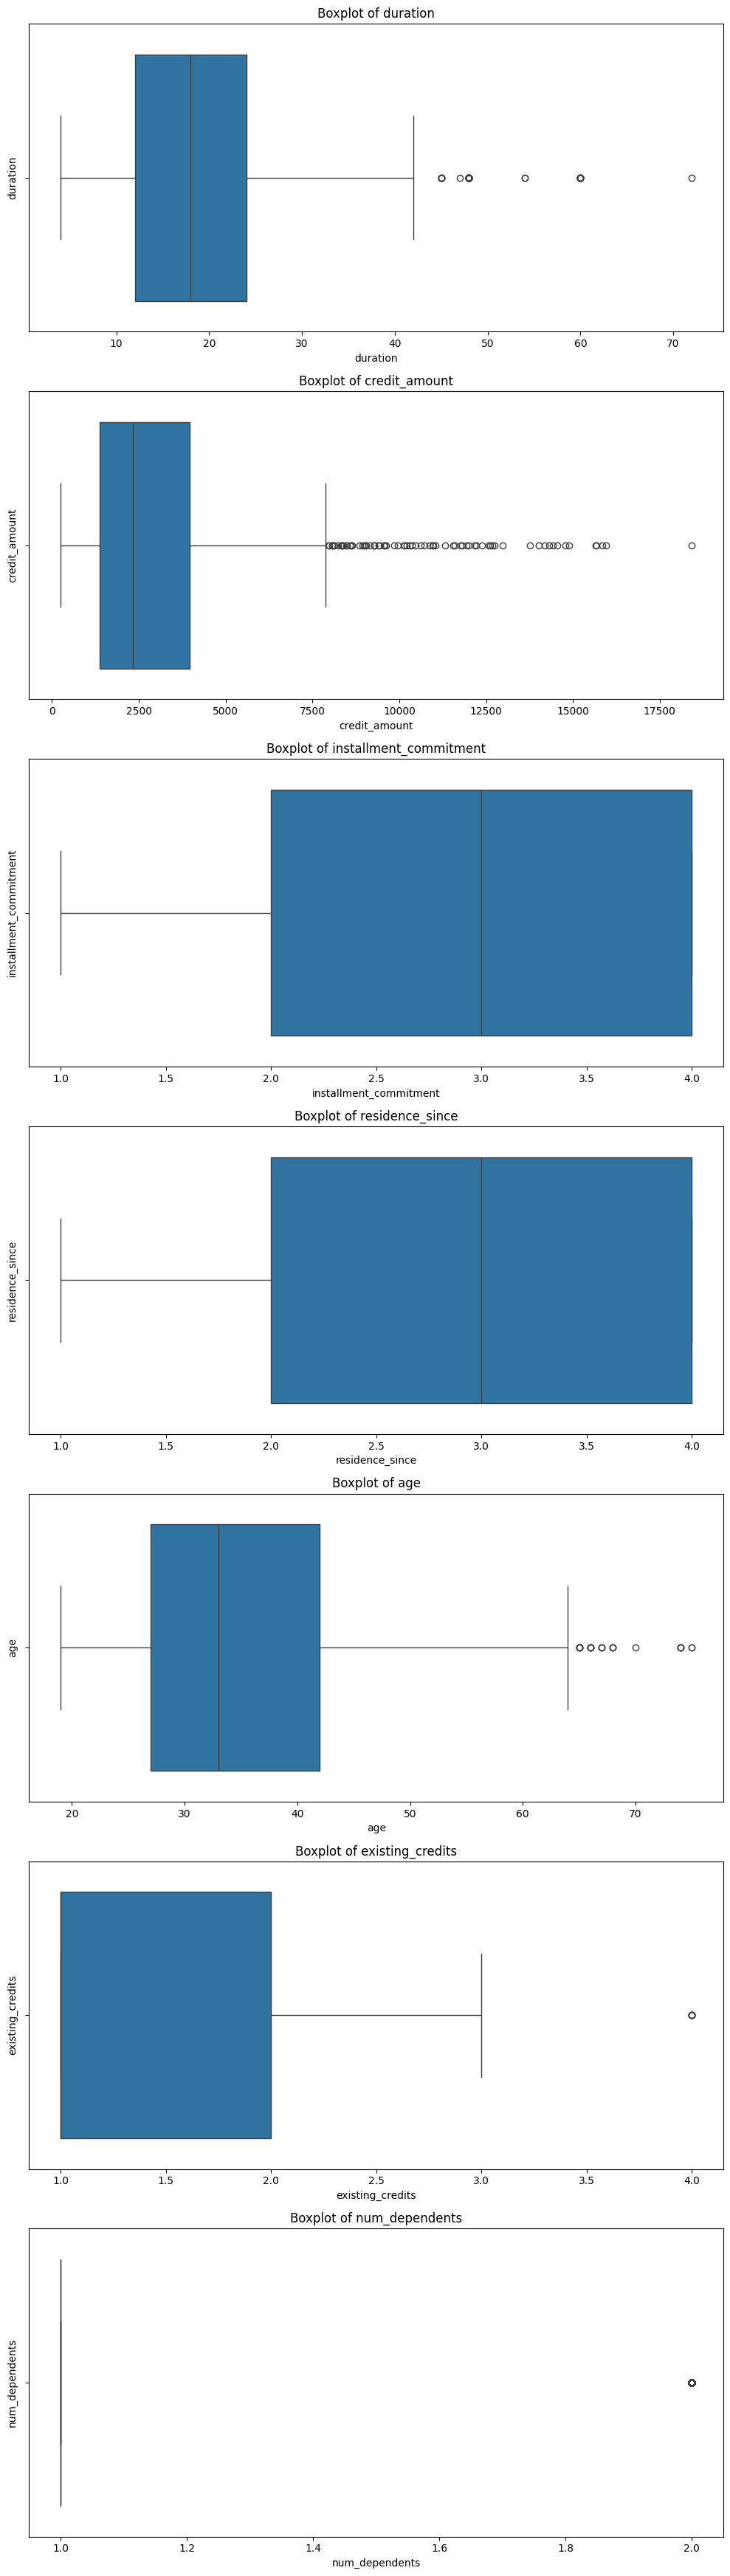

In [319]:
# select only the numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create a subplot for eacth numeric column
num_vars = len(numeric_cols)
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(10, 5 * num_vars))
# Create boxplots for each numeric column
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")
    ax.set_ylabel(col)
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

## Bivariate analysis

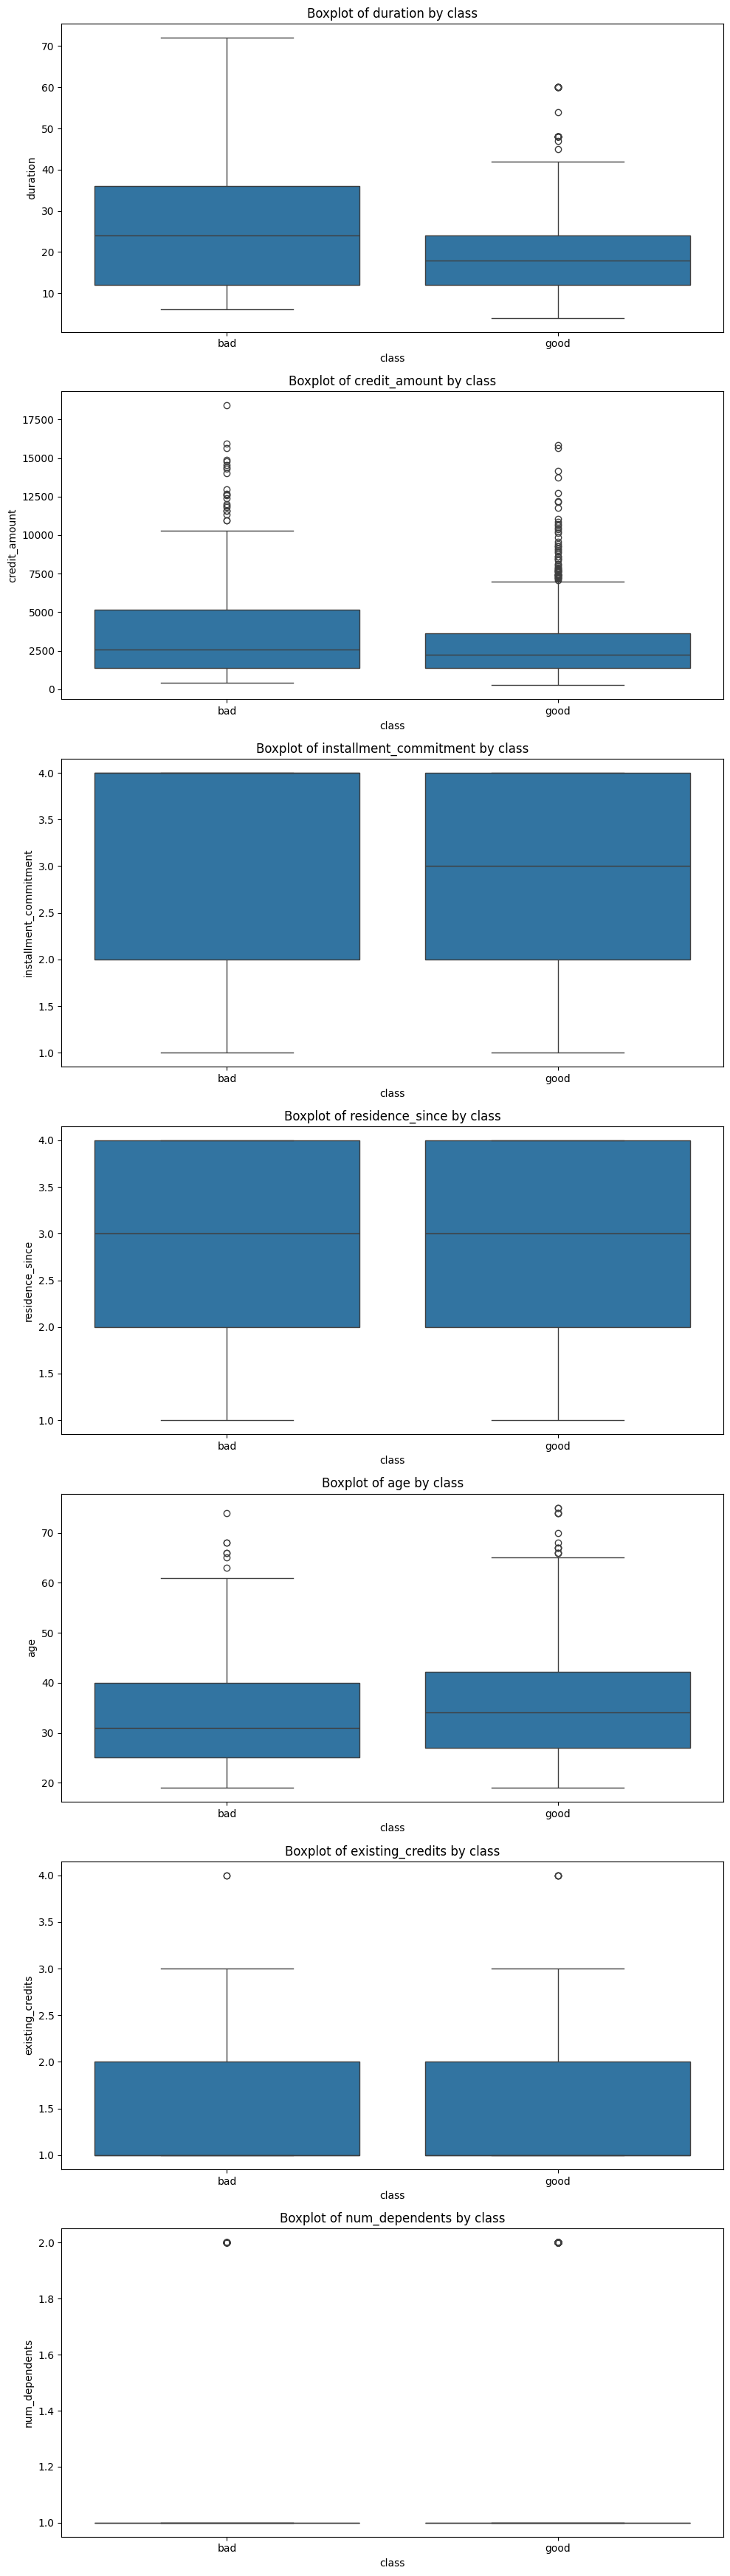

In [320]:
## Bivariate analysis
# Select the numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Select the target variable
target_col = 'class'
# Create a subplot for each numeric column
num_vars = len(numeric_cols)
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(10, 5 * num_vars))
# Create boxplots for each numeric column
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=data[target_col], y=data[col], ax=ax)
    ax.set_title(f"Boxplot of {col} by {target_col}")
    ax.set_ylabel(col)
    ax.set_xlabel(target_col)
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

In [321]:
data[target_col].value_counts()

class
good    700
bad     300
Name: count, dtype: int64

In [322]:
data[target_col] = np.where(data[target_col] == 'good', 0, 1)

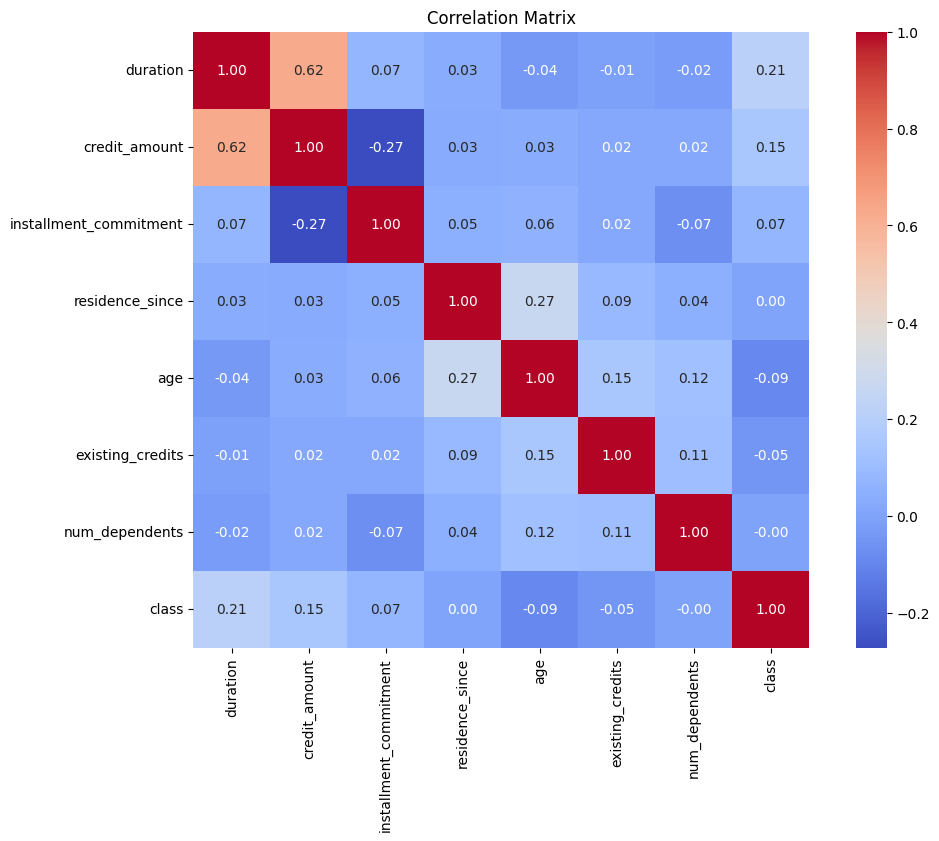

class                     1.000000
duration                  0.214927
credit_amount             0.154739
installment_commitment    0.072404
residence_since           0.002967
num_dependents           -0.003015
existing_credits         -0.045732
age                      -0.091127
Name: class, dtype: float64


In [323]:
# Correlation matrix
correlation_matrix = data.select_dtypes([np.number]).corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()
# Correlation with target variable
correlation_with_target = correlation_matrix[target_col].sort_values(ascending=False)
print(correlation_with_target)

## Categorical analysis

In [324]:
data.head(2).transpose()

0                   1
checking_status                                     <0            0<=X<200
duration                                             6                  48
credit_history          critical/other existing credit       existing paid
purpose                                       radio/tv            radio/tv
credit_amount                                     1169                5951
savings_status                        no known savings                <100
employment                                         >=7              1<=X<4
installment_commitment                               4                   2
personal_status                            male single  female div/dep/mar
other_parties                                     none                none
residence_since                                      4                   2
property_magnitude                         real estate         real estate
age                                                 67                  22
other_payment_plans                               none                none
housing                                            own                 own
existing_credits                                     2                   1
job                                            skilled             skilled
num_dependents                                       1                   1
own_telephone                                      yes                none
foreign_worker                                     yes                 yes
class                                                0                   1

In [325]:
#¬†conversion from category to string
list_object = ['credit_history', 'purpose', 'other_payment_plans', 'personal_status', 'other_parties', 'property_magnitude', 'housing', 'job', 'own_telephone', 'foreign_worker']
for col in list_object:
    data[col] = data[col].astype(str)
    print(f"Column '{col}' converted to str.")
    print(data[col].dtypes)
    print("-" * 50)
    print("\n")

Column 'credit_history' converted to str.
object
--------------------------------------------------


Column 'purpose' converted to str.
object
--------------------------------------------------


Column 'other_payment_plans' converted to str.
object
--------------------------------------------------


Column 'personal_status' converted to str.
object
--------------------------------------------------


Column 'other_parties' converted to str.
object
--------------------------------------------------


Column 'property_magnitude' converted to str.
object
--------------------------------------------------


Column 'housing' converted to str.
object
--------------------------------------------------


Column 'job' converted to str.
object
--------------------------------------------------


Column 'own_telephone' converted to str.
object
--------------------------------------------------


Column 'foreign_worker' converted to str.
object
--------------------------------------------------

In [326]:
data.dtypes

checking_status           category
duration                     int64
credit_history              object
purpose                     object
credit_amount                int64
savings_status            category
employment                category
installment_commitment       int64
personal_status             object
other_parties               object
residence_since              int64
property_magnitude          object
age                          int64
other_payment_plans         object
housing                     object
existing_credits             int64
job                         object
num_dependents               int64
own_telephone               object
foreign_worker              object
class                        int64
dtype: object

In [327]:
list_var_num = data.select_dtypes(['float64', 'int64']).columns.tolist()
list_var_str = data.select_dtypes(['object']).columns.tolist()
list_var_dat = data.select_dtypes(['datetime']).columns.tolist()
list_var_cat = data.select_dtypes(['category']).columns.tolist()
print(f"list variable numeric: {list_var_num}")
print(f"list variable object: {list_var_str}")
print(f"list variable datetime: {list_var_dat}")
print(f"list variable category: {list_var_cat}\n")

list variable numeric: ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents', 'class']
list variable object: ['credit_history', 'purpose', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
list variable datetime: []
list variable category: ['checking_status', 'savings_status', 'employment']



In [328]:
print(f"Number of variable numeric: {len(list_var_num)}")
print(f"Number of variable object: {len(list_var_str)}")
print(f"Number of variable datetime: {len(list_var_dat)}")
print(f"Number of variable category: {len(list_var_cat)}\n")

Number of variable numeric: 8
Number of variable object: 10
Number of variable datetime: 0
Number of variable category: 3



Check the number of unique values

In [329]:
print(f"Number of modalities for variable of type categroy: \n {df[list_var_cat].nunique()}")

Number of modalities for variable of type categroy: 
 checking_status    4
savings_status     5
employment         5
dtype: int64


In [330]:
print(f"Number of modalities for variable of type categroy: \n {df[list_var_str].nunique()}")

Number of modalities for variable of type categroy: 
 credit_history          5
purpose                10
personal_status         4
other_parties           3
property_magnitude      4
other_payment_plans     3
housing                 3
job                     4
own_telephone           2
foreign_worker          2
dtype: int64


In [331]:
# Definie a function which displays the number and the risk rate per category
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_count_and_ratio(df, variable, target='qual'):
    # Calculate the counts and ratios
    counts = df[variable].value_counts()
    ratios = df.groupby(variable)[target].mean()
    #¬†Create a combined DataFrame for plotting
    combined_df = pd.DataFrame({'count': counts, 'ratio': ratios}).reset_index()
    combined_df.columns = [variable, 'count', 'ratio']
    # Create the plot
    plt.figure(figsize=(12, 6))
    ax1 = sns.barplot(x=variable, y='count', data=combined_df, color='blue', alpha=0.6)
    ax2 = plt.gca().twinx()
    sns.lineplot(x=variable, y='ratio', data=combined_df, color='red', marker='o', label = 'ratio', ax=ax2)
    plt.xticks(rotation=90)
    # Displaty the count values on top of the bars
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')
    #¬†Set title and labels
    plt.title(f"Count and Ratio of {variable} by {target}")
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.ylim(0)
    ax2.set_ylabel('Ratio (qual=1)')

    # Add legends
    plt.legend(loc='upper left')
    ax2.legend('Ratio', loc='upper right')
    # Show the plot
    plt.tight_layout()
    plt.show()

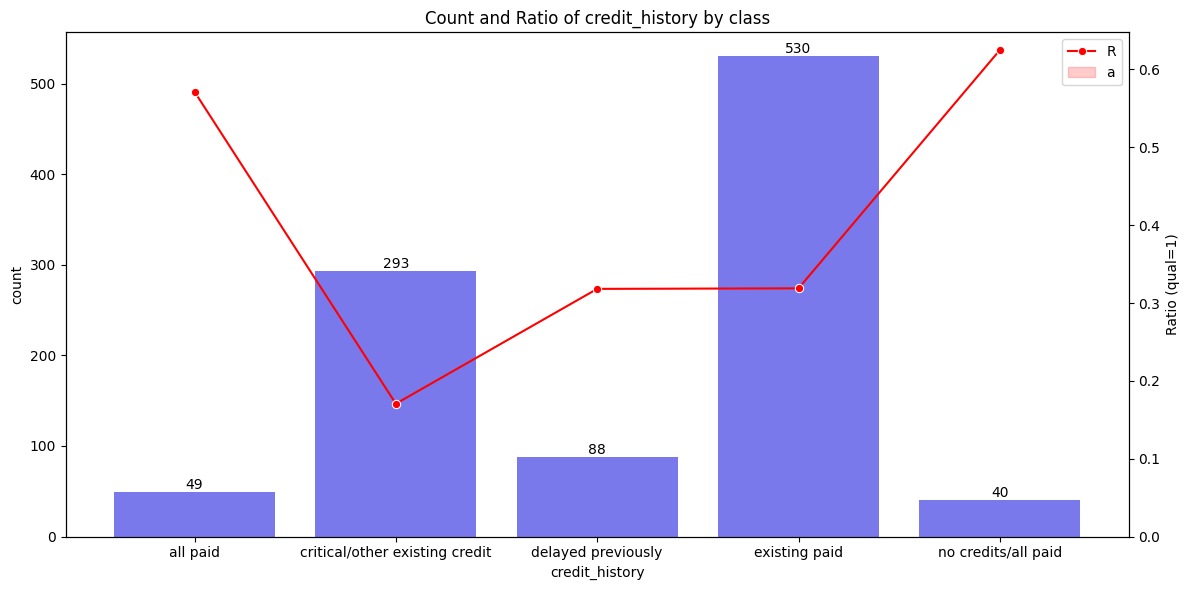

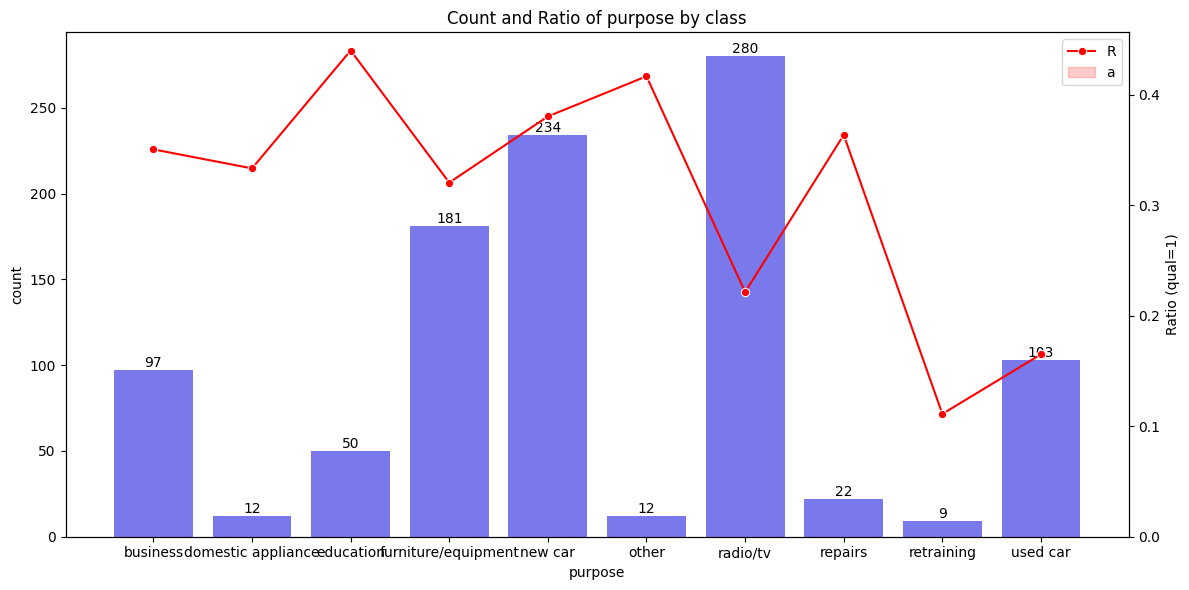

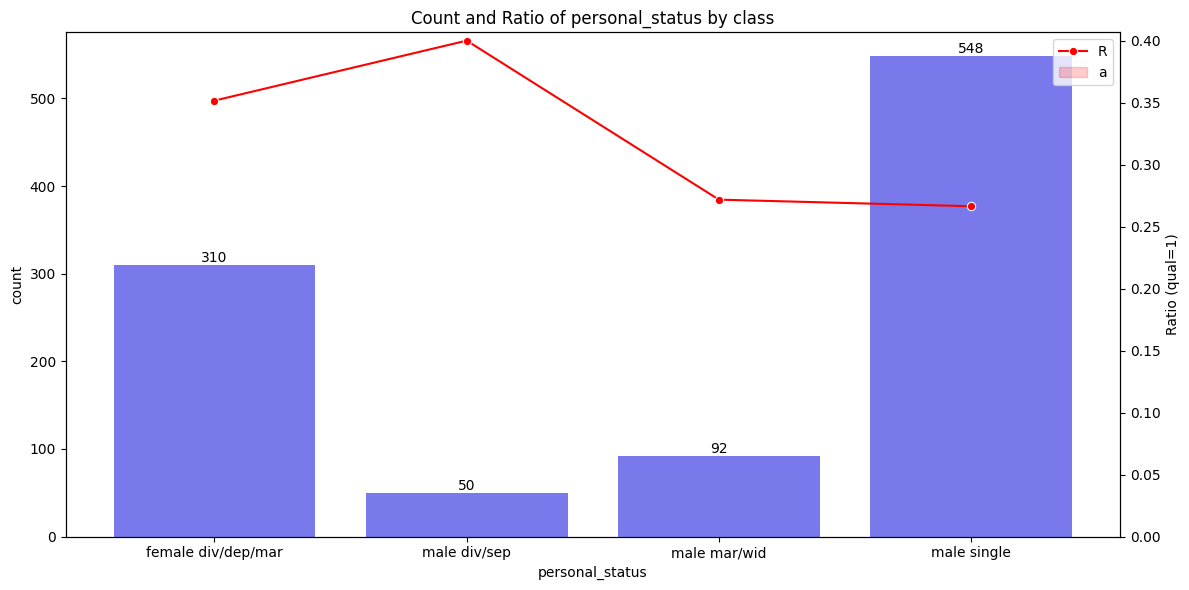

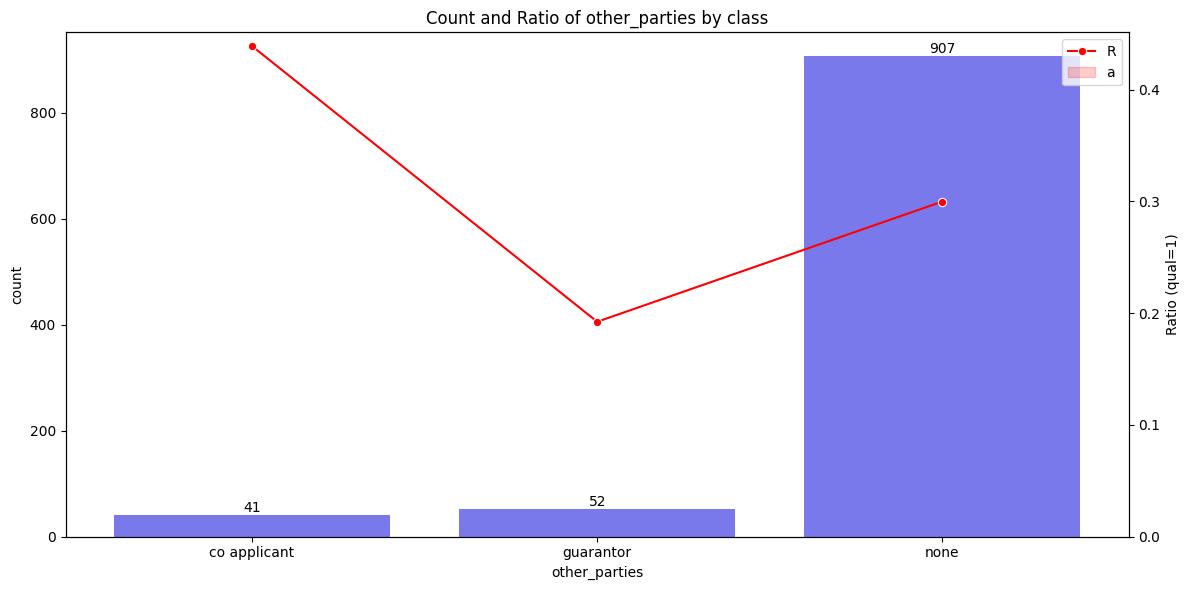

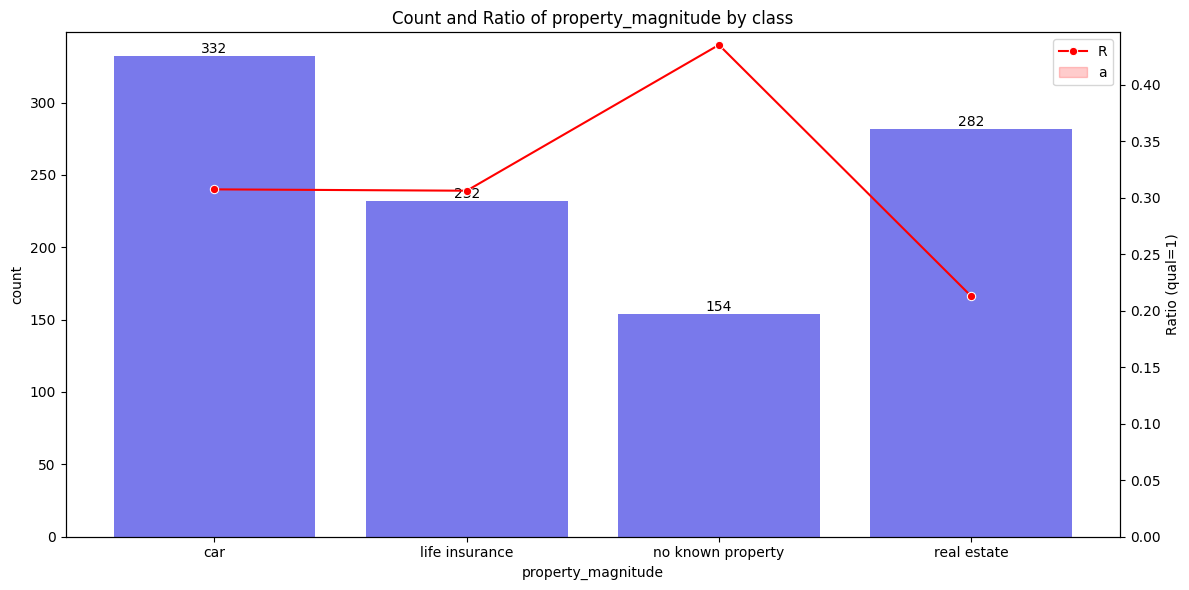

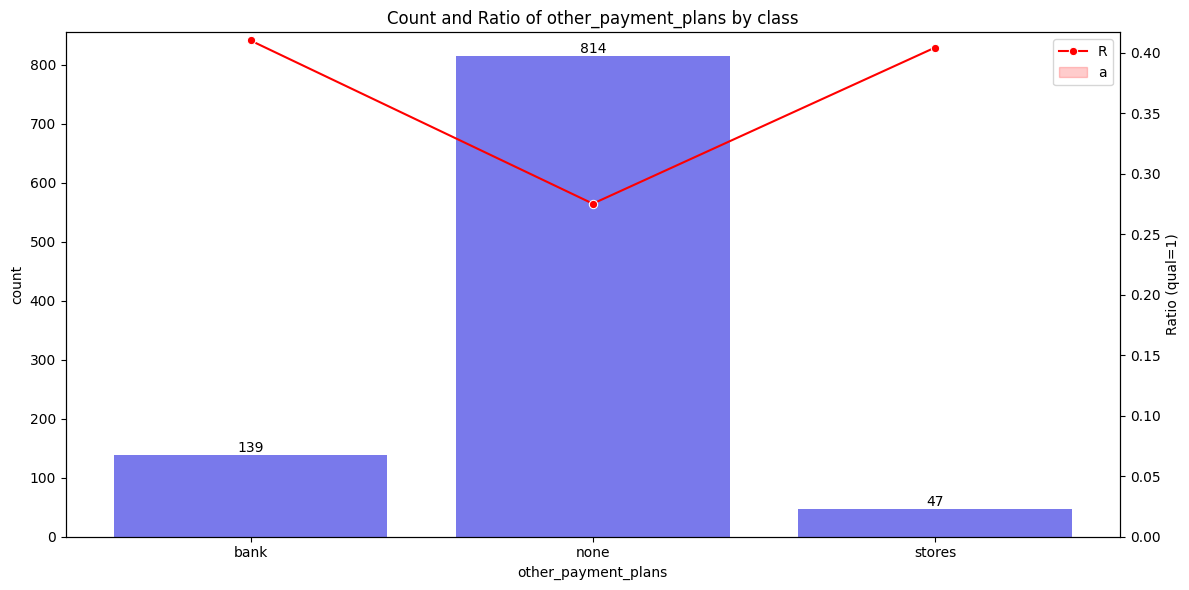

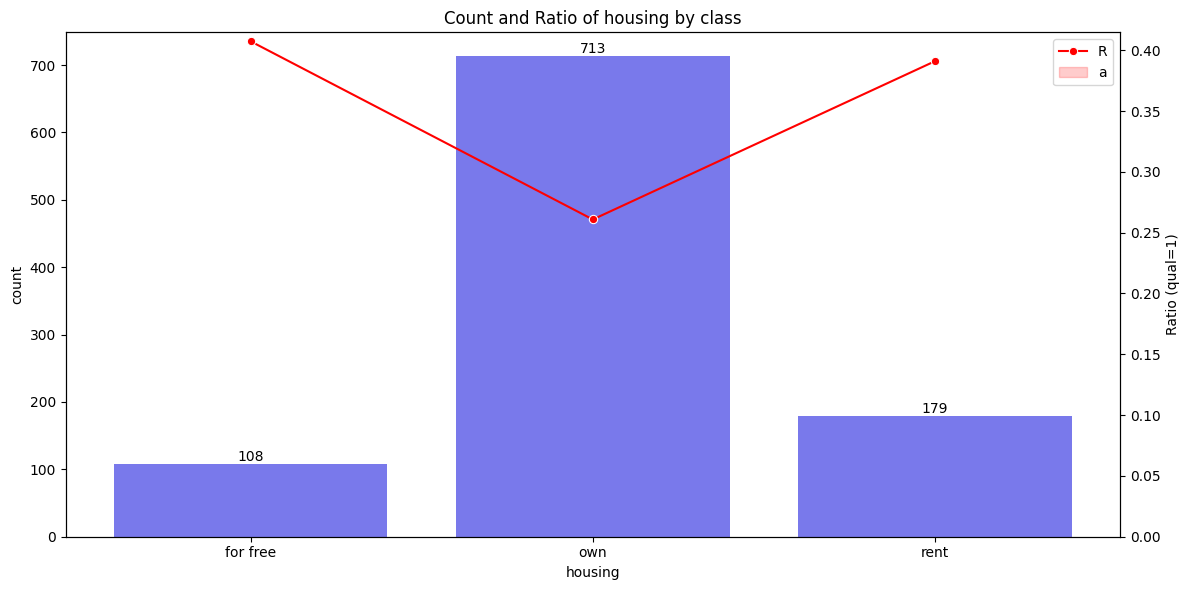

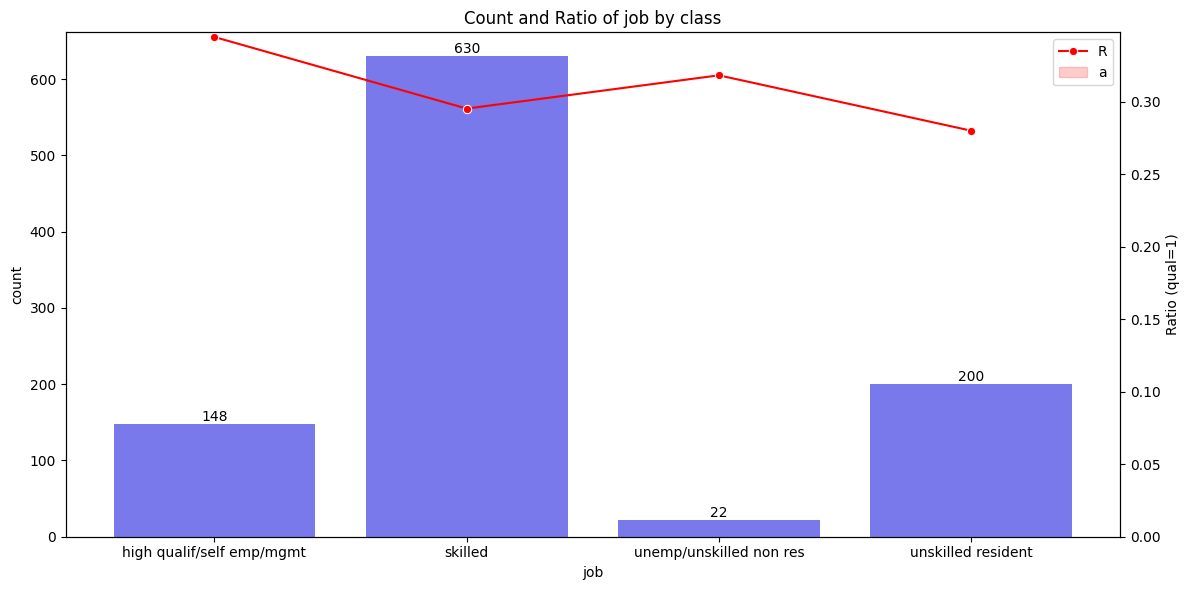

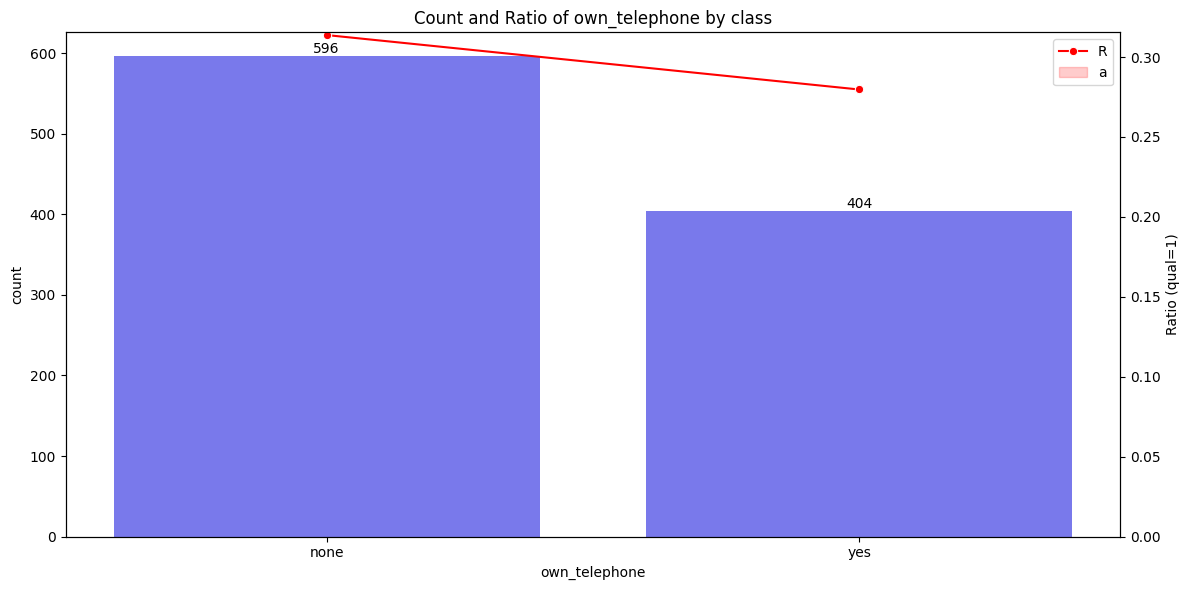

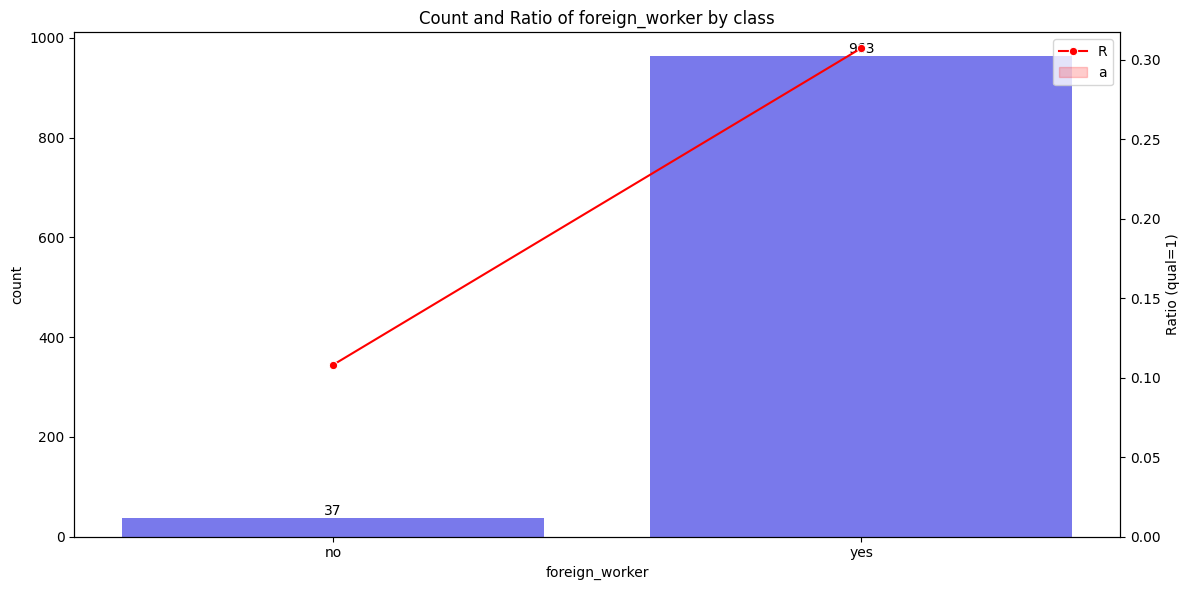

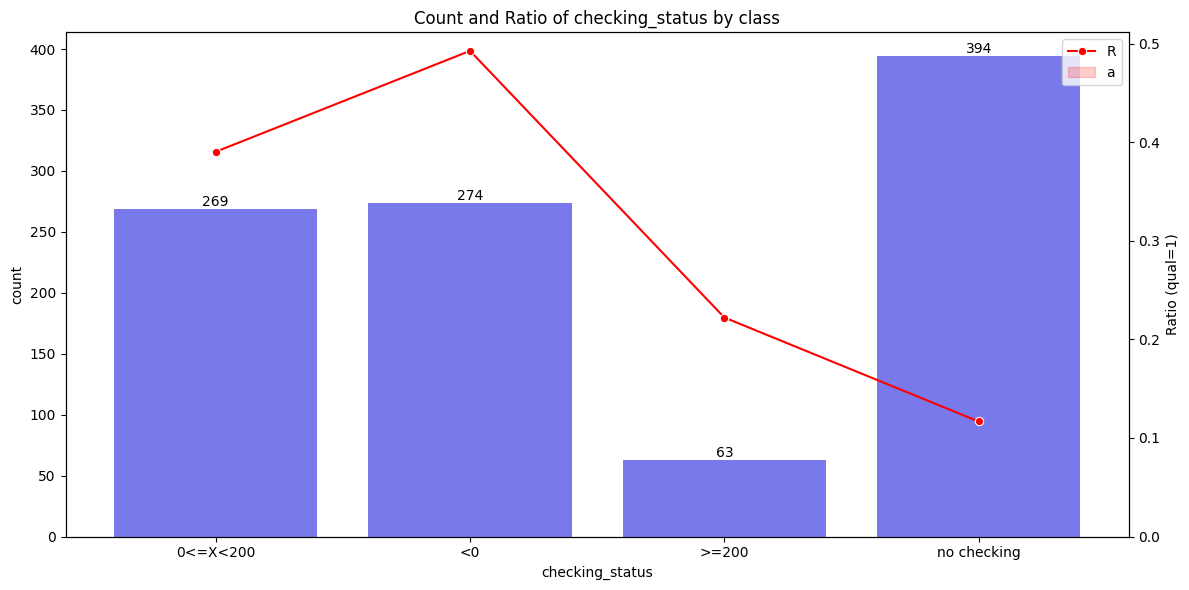

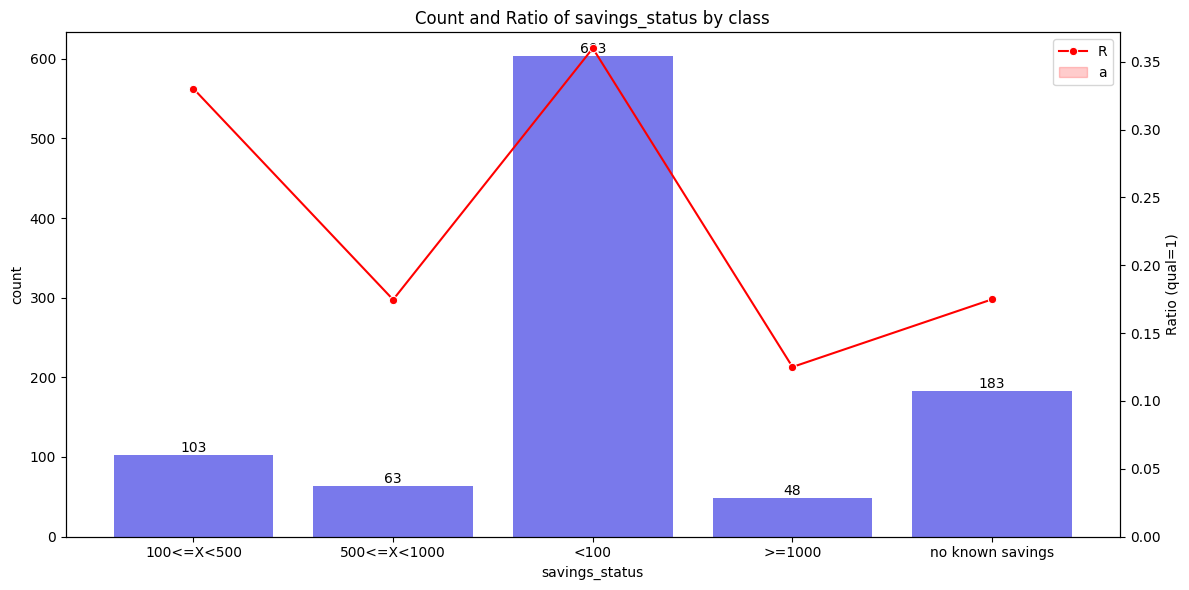

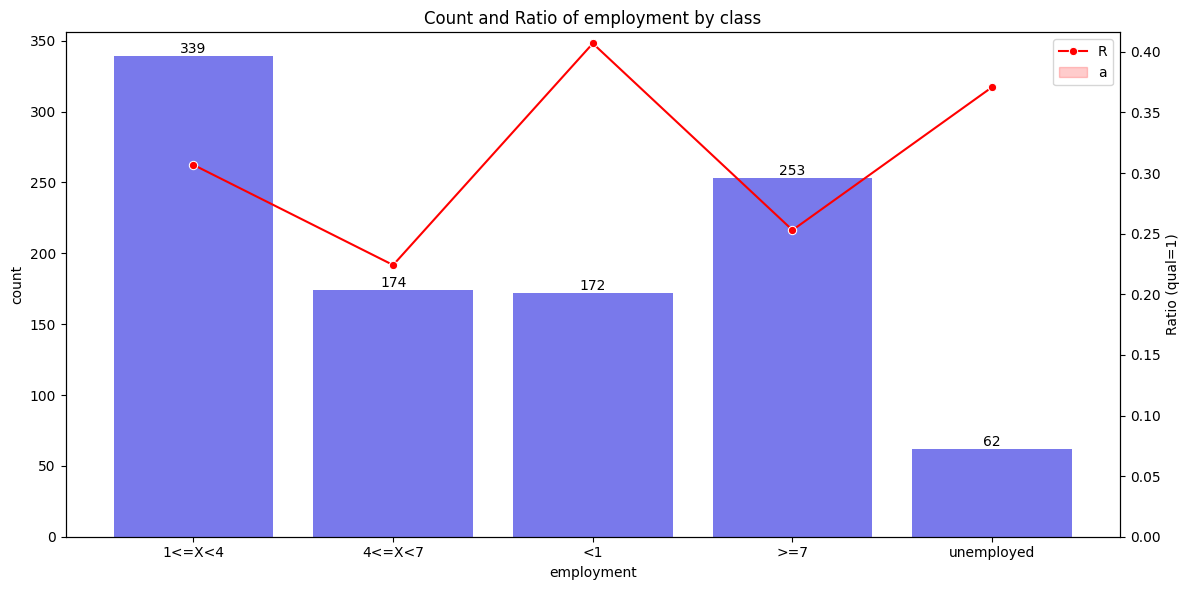

In [332]:
list_str_cat = list_var_str + list_var_cat
for col in list_str_cat:
    plot_count_and_ratio(data, col, target_col)

## Principal Component Analysis (PCA)

**PCA is a dimension reduction algorithm**

**Pre-processing**

Missing values: drop or impute?

For PCA we need to have a dataset without missing values.

Depending of their number we can df.dropna() if their percentage is < 5% or impute them by their median for instance.

In [333]:
df.isnull().mean().sort_values(ascending=False).head(10)

checking_status        0.0
property_magnitude     0.0
foreign_worker         0.0
own_telephone          0.0
num_dependents         0.0
job                    0.0
existing_credits       0.0
housing                0.0
other_payment_plans    0.0
age                    0.0
dtype: float64

Example if we have chosen to imputation missing values.

In [334]:
# Numeric variables missing imputation:
data = df.copy()
data_numeric = data.select_dtypes(include=['float64', 'int64']).astype('float64') #¬†to avoid problem wint Int when using the mean
data_numeric.fillna(data_numeric.mean(), inplace=True)

In [335]:
def impute_categorical_with_unknown(df):
    """
    Replaces missing values in all categorical columns with 'Unknown'.
    
    Parameters:
    - df: pd.DataFrame ‚Äî The input DataFrame (some columns must be of dtype 'category')

    Returns:
    - df: pd.DataFrame ‚Äî Modified DataFrame with 'Unknown' filled in categorical columns
    """
    for col in df.select_dtypes(include='category').columns:
        # Add 'Unknown' to categories if not already present
        if 'Unknown' not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories('Unknown')
        
        # Fill missing values with 'Unknown'
        df[col] = df[col].fillna('Unknown')
    
    return df

In [336]:
# Categorical variables missing imputation:
data_category = data.select_dtypes(include=['category'])
data_category = impute_categorical_with_unknown(data_category)

In [337]:
data_category.head(10)

checking_status                  credit_history              purpose  \
0              <0  critical/other existing credit             radio/tv   
1        0<=X<200                   existing paid             radio/tv   
2     no checking  critical/other existing credit            education   
3              <0                   existing paid  furniture/equipment   
4              <0              delayed previously              new car   
5     no checking                   existing paid            education   
6     no checking                   existing paid  furniture/equipment   
7        0<=X<200                   existing paid             used car   
8     no checking                   existing paid             radio/tv   
9        0<=X<200  critical/other existing credit              new car   

     savings_status  employment     personal_status other_parties  \
0  no known savings         >=7         male single          none   
1              <100      1<=X<4  female div/dep/mar          none   
2              <100      4<=X<7         male single          none   
3              <100      4<=X<7         male single     guarantor   
4              <100      1<=X<4         male single          none   
5  no known savings      1<=X<4         male single          none   
6       500<=X<1000         >=7         male single          none   
7              <100      1<=X<4         male single          none   
8            >=1000      4<=X<7        male div/sep          none   
9              <100  unemployed        male mar/wid          none   

  property_magnitude other_payment_plans   housing                        job  \
0        real estate                none       own                    skilled   
1        real estate                none       own                    skilled   
2        real estate                none       own         unskilled resident   
3     life insurance                none  for free                    skilled   
4  no known property                none  for free                    skilled   
5  no known property                none  for free         unskilled resident   
6     life insurance                none       own                    skilled   
7                car                none      rent  high qualif/self emp/mgmt   
8        real estate                none       own         unskilled resident   
9                car                none       own  high qualif/self emp/mgmt   

  own_telephone foreign_worker class  
0           yes            yes  good  
1          none            yes   bad  
2          none            yes  good  
3          none            yes  good  
4          none            yes   bad  
5           yes            yes  good  
6          none            yes  good  
7           yes            yes  good  
8          none            yes  good  
9          none            yes   bad

In [338]:
from sklearn.preprocessing import OrdinalEncoder

ord_encoder = OrdinalEncoder()
for col in data_category.columns:
    # Check if the column is categorical
    if pd.api.types.is_categorical_dtype(data_category[col]):
        # Convert to string type for OrdinalEncoder
        data_category[col] = data_category[col].astype(str)

Standaridize the numerical data

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_numeric_scaled = scaler.fit_transform(data_numeric)
data_numeric_scaled = pd.DataFrame(data_numeric_scaled, columns=data_numeric.columns)
data_numeric_scaled.head(2)

duration  credit_amount  installment_commitment  residence_since       age  \
0 -1.236478      -0.745131                0.918477         1.046987  2.766456   
1  2.248194       0.949817               -0.870183        -0.765977 -1.191404   

   existing_credits  num_dependents  
0          1.027079        -0.42829  
1         -0.704926        -0.42829

Encode 'object' variables

In [340]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
data_category_encoded = encoder.fit_transform(data_category)
data_category_encoded = pd.DataFrame(data_category_encoded, columns=encoder.get_feature_names_out(data_category.columns))
data_category_encoded.head(2)

checking_status_<0  checking_status_>=200  checking_status_no checking  \
0                 1.0                    0.0                          0.0   
1                 0.0                    0.0                          0.0   

   credit_history_critical/other existing credit  \
0                                            1.0   
1                                            0.0   

   credit_history_delayed previously  credit_history_existing paid  \
0                                0.0                           0.0   
1                                0.0                           1.0   

   credit_history_no credits/all paid  purpose_domestic appliance  \
0                                 0.0                         0.0   
1                                 0.0                         0.0   

   purpose_education  purpose_furniture/equipment  ...  \
0                0.0                          0.0  ...   
1                0.0                          0.0  ...   

   other_payment_plans_none  other_payment_plans_stores  housing_own  \
0                       1.0                         0.0          1.0   
1                       1.0                         0.0          1.0   

   housing_rent  job_skilled  job_unemp/unskilled non res  \
0           0.0          1.0                          0.0   
1           0.0          1.0                          0.0   

   job_unskilled resident  own_telephone_yes  foreign_worker_yes  class_good  
0                     0.0                1.0                 1.0         1.0  
1                     0.0                0.0                 1.0         0.0  

[2 rows x 42 columns]

We skip the categorical variables (come back to them later)

In [341]:
data_pca = pd.concat([data_numeric_scaled, data_category_encoded], axis=1)
data_pca.head(2)

duration  credit_amount  installment_commitment  residence_since       age  \
0 -1.236478      -0.745131                0.918477         1.046987  2.766456   
1  2.248194       0.949817               -0.870183        -0.765977 -1.191404   

   existing_credits  num_dependents  checking_status_<0  \
0          1.027079        -0.42829                 1.0   
1         -0.704926        -0.42829                 0.0   

   checking_status_>=200  checking_status_no checking  ...  \
0                    0.0                          0.0  ...   
1                    0.0                          0.0  ...   

   other_payment_plans_none  other_payment_plans_stores  housing_own  \
0                       1.0                         0.0          1.0   
1                       1.0                         0.0          1.0   

   housing_rent  job_skilled  job_unemp/unskilled non res  \
0           0.0          1.0                          0.0   
1           0.0          1.0                          0.0   

   job_unskilled resident  own_telephone_yes  foreign_worker_yes  class_good  
0                     0.0                1.0                 1.0         1.0  
1                     0.0                0.0                 1.0         0.0  

[2 rows x 49 columns]

### PCA dimensionality reduction

#### Explained variance

In [342]:
from sklearn.decomposition import PCA
NB_COMPONENTS = 7
pca = PCA(n_components=NB_COMPONENTS)
# Fit and transform the data
data_numeric_pca = pca.fit_transform(data_pca)

In [343]:
explined_variance = pca.explained_variance_ratio_

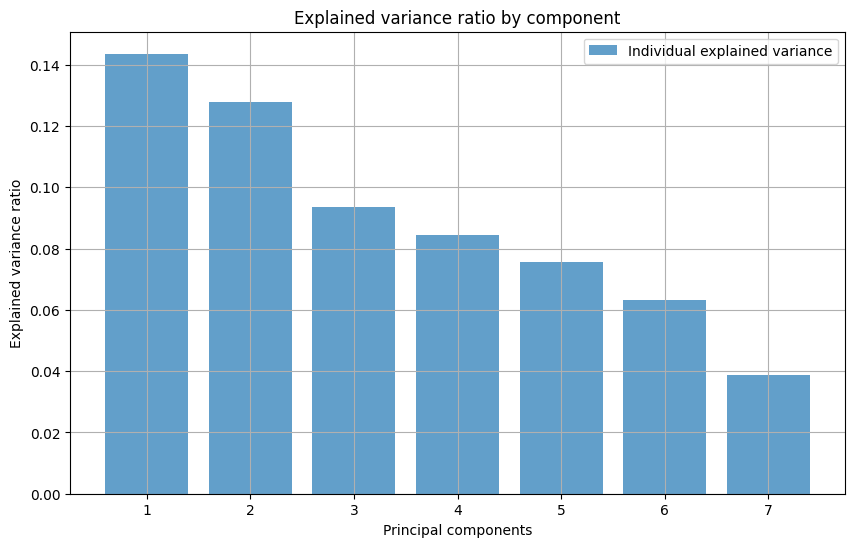

In [344]:
#¬†Create an histogram of the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, NB_COMPONENTS + 1), explined_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance ratio by component')
plt.xticks(range(1, NB_COMPONENTS + 1))
plt.legend(loc='best')
plt.grid()
plt.show()

In [345]:
total_variance_ratio_explained = np.sum(explined_variance)
print(f"Total variance ratio explained by {NB_COMPONENTS} components: {total_variance_ratio_explained:.2%}")

Total variance ratio explained by 7 components: 62.73%


With NB_COMPONENTS = 7, the PCA explains is above 80% of the variance in the data.

#### Projections of the observations

In [346]:
pca_columns_names = [f"PC{i+1}" for i in range(NB_COMPONENTS)]
# Create a DataFrame with PCA results
data_pca_df = pd.DataFrame(data_numeric_pca, columns=pca_columns_names)
# Concatenate PCA results with the original DataFrame

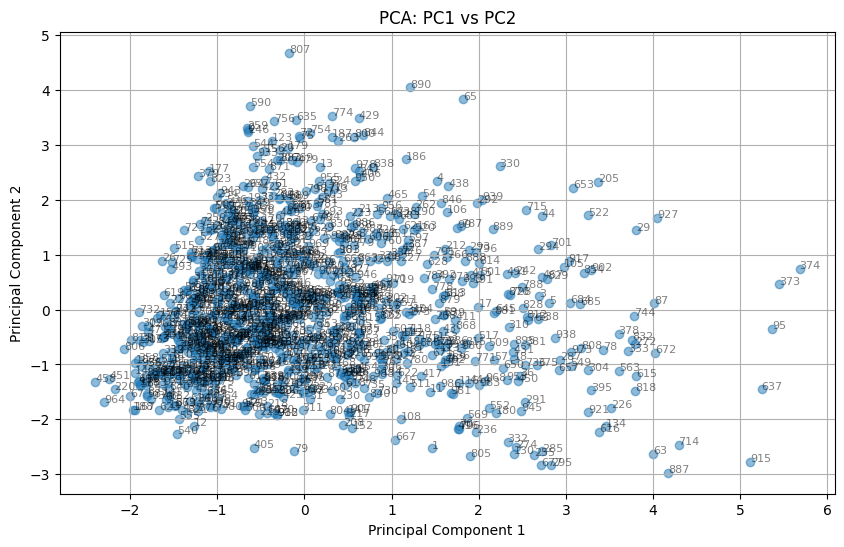

In [347]:
# Visualize the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(data_pca_df['PC1'], data_pca_df['PC2'], alpha=0.5)

# Annotate points with index
for i in range(len(data_pca_df)):
    plt.annotate(i, (data_pca_df['PC1'][i], data_pca_df['PC2'][i]), fontsize=8, alpha=0.5)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [353]:
# Try to explain two outliers
data.iloc[373:375, :]

checking_status  duration                  credit_history  purpose  \
373     no checking        60  critical/other existing credit  new car   
374        0<=X<200        60                        all paid    other   

     credit_amount    savings_status employment  installment_commitment  \
373          13756  no known savings        >=7                       2   
374          14782        100<=X<500        >=7                       3   

        personal_status other_parties  ...  age other_payment_plans   housing  \
373         male single          none  ...   63                bank  for free   
374  female div/dep/mar          none  ...   60                bank  for free   

    existing_credits                        job  num_dependents own_telephone  \
373                1  high qualif/self emp/mgmt               1           yes   
374                2  high qualif/self emp/mgmt               1           yes   

     foreign_worker class age_group  
373             yes  good       50+  
374             yes   bad       50+  

[2 rows x 22 columns]

In [354]:
data.describe(include='all')

checking_status     duration credit_history   purpose  credit_amount  \
count             1000  1000.000000           1000      1000    1000.000000   
unique               4          NaN              5        10            NaN   
top        no checking          NaN  existing paid  radio/tv            NaN   
freq               394          NaN            530       280            NaN   
mean               NaN    20.903000            NaN       NaN    3271.258000   
std                NaN    12.058814            NaN       NaN    2822.736876   
min                NaN     4.000000            NaN       NaN     250.000000   
25%                NaN    12.000000            NaN       NaN    1365.500000   
50%                NaN    18.000000            NaN       NaN    2319.500000   
75%                NaN    24.000000            NaN       NaN    3972.250000   
max                NaN    72.000000            NaN       NaN   18424.000000   

       savings_status employment  installment_commitment personal_status  \
count            1000       1000             1000.000000            1000   
unique              5          5                     NaN               4   
top              <100     1<=X<4                     NaN     male single   
freq              603        339                     NaN             548   
mean              NaN        NaN                2.973000             NaN   
std               NaN        NaN                1.118715             NaN   
min               NaN        NaN                1.000000             NaN   
25%               NaN        NaN                2.000000             NaN   
50%               NaN        NaN                3.000000             NaN   
75%               NaN        NaN                4.000000             NaN   
max               NaN        NaN                4.000000             NaN   

       other_parties  ...          age other_payment_plans  housing  \
count           1000  ...  1000.000000                1000     1000   
unique             3  ...          NaN                   3        3   
top             none  ...          NaN                none      own   
freq             907  ...          NaN                 814      713   
mean             NaN  ...    35.546000                 NaN      NaN   
std              NaN  ...    11.375469                 NaN      NaN   
min              NaN  ...    19.000000                 NaN      NaN   
25%              NaN  ...    27.000000                 NaN      NaN   
50%              NaN  ...    33.000000                 NaN      NaN   
75%              NaN  ...    42.000000                 NaN      NaN   
max              NaN  ...    75.000000                 NaN      NaN   

       existing_credits      job  num_dependents own_telephone  \
count       1000.000000     1000     1000.000000          1000   
unique              NaN        4             NaN             2   
top                 NaN  skilled             NaN          none   
freq                NaN      630             NaN           596   
mean           1.407000      NaN        1.155000           NaN   
std            0.577654      NaN        0.362086           NaN   
min            1.000000      NaN        1.000000           NaN   
25%            1.000000      NaN        1.000000           NaN   
50%            1.000000      NaN        1.000000           NaN   
75%            2.000000      NaN        1.000000           NaN   
max            4.000000      NaN        2.000000           NaN   

        foreign_worker class age_group  
count             1000  1000      1000  
unique               2     2         2  
top                yes  good       <50  
freq               963   700       875  
mean               NaN   NaN       NaN  
std                NaN   NaN       NaN  
min                NaN   NaN       NaN  
25%                NaN   NaN       NaN  
50%                NaN   NaN       NaN  
75%                NaN   NaN       NaN  
max                NaN   NaN       NaN  

[11 ro

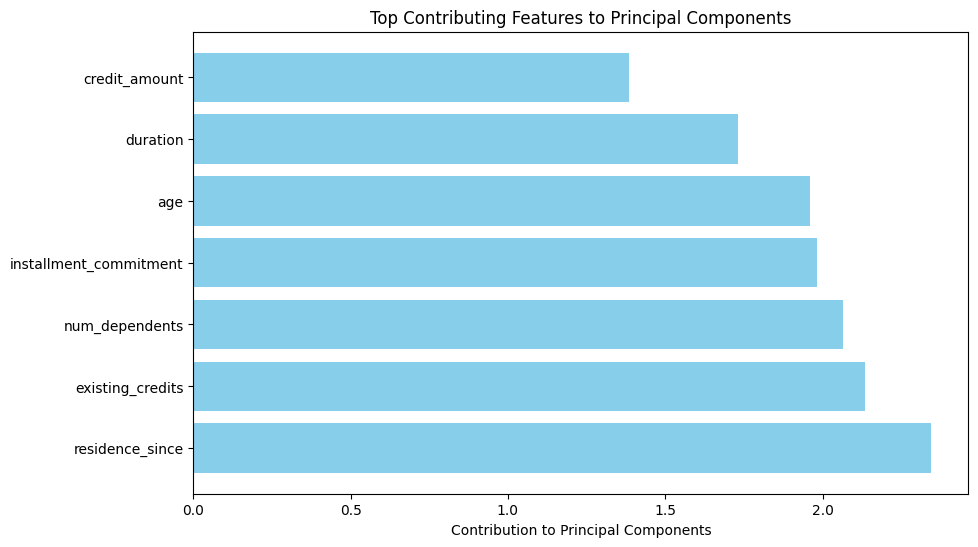

In [355]:
### Bar plot of top contributing features to principal components
import matplotlib.pyplot as plt
import numpy as np

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = data_pca.columns

contributions = np.sum(np.abs(loadings), axis=1)
top_indices = np.argsort(contributions)[-NB_COMPONENTS:]  # Get indices of top NB_COMPONENTS features
top_features = [feature_names[i] for i in top_indices]
top_contributions = contributions[top_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_contributions, color='skyblue')
plt.xlabel('Contribution to Principal Components')
plt.title('Top Contributing Features to Principal Components')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest contribution on top
plt.show()
#¬†save the PCA results
data_pca_df.to_csv("pca_results.csv", index=False)

We could put all these steps in a pipeline (exercice).

We could also have to choose to encode the categorical features using weight of evidence (woe)

In [367]:
data.dtypes

checking_status           category
duration                     int64
credit_history            category
purpose                   category
credit_amount                int64
savings_status            category
employment                category
installment_commitment       int64
personal_status           category
other_parties             category
residence_since              int64
property_magnitude        category
age                          int64
other_payment_plans       category
housing                   category
existing_credits             int64
job                       category
num_dependents               int64
own_telephone             category
foreign_worker            category
class                     category
age_group                   object
dtype: object

In [365]:
def calculate_woe(df, features, target):
    epsilon = 1e-10
    # Assure that the target is integer type (0/1)
    df[target] = df[target].astype(int)

    total_goods = (df[target] == 0).sum()
    total_bads = (df[target] == 1).sum()

    # Group and aggregate
    grouped = df.groupby(features)[target].agg(['count', 'sum'])
    
    grouped['good'] = total_goods - grouped['sum']
    grouped['bad'] = grouped['sum']
    
    # Avoid division by zero with epsilon
    grouped['good_dist'] = (grouped['good'] + epsilon) / (total_goods + epsilon)
    grouped['bad_dist'] = (grouped['bad'] + epsilon) / (total_bads + epsilon)
    
    # Calculate WOE and IV
    grouped['woe'] = np.log(grouped['good_dist'] / grouped['bad_dist'])
    grouped['iv'] = (grouped['good_dist'] - grouped['bad_dist']) * grouped['woe']
    iv = grouped['iv'].sum()

    # Map WOE values to the dataframe
    woe_dict = grouped['woe'].to_dict()
    df[features + "_woe"] = df[features].map(woe_dict)
    
    return df, iv

def calculate_iv(df, features, target):
    """
    Calculate the Information Value (IV) for a given feature.
    Parameters:
    - df: pd.DataFrame ‚Äî The input DataFrame.
    - features: str ‚Äî The feature for which to calculate IV.
    - target: str ‚Äî The target variable.
    Returns:
    - iv: float ‚Äî The Information Value.
    """
    # Calculate the WOE and IV
    df, iv = calculate_woe(df, features, target)
    return iv

In [371]:
data['class'] = np.where(data['class'] == 'good', 0, 1)

In [372]:
categorical_data = data.select_dtypes(include=['object', 'category'])
columns = categorical_data.columns.tolist()
target_col = 'class'
categorical_data_woe = pd.DataFrame()
# Convert categorical columns to string
for col in columns:
    categorical_data_woe = calculate_woe(data, col, target_col)

# categorical_data_woe = categorical_data_woe[[col for col in categorical_data_woe.columns if col.endswith('_woe')]]
# #¬†Display the first rows
# categorical_data_woe.head(2)

In [373]:
categorical_data_woe

(    checking_status  duration                  credit_history  \
 0                <0         6  critical/other existing credit   
 1          0<=X<200        48                   existing paid   
 2       no checking        12  critical/other existing credit   
 3                <0        42                   existing paid   
 4                <0        24              delayed previously   
 ..              ...       ...                             ...   
 995     no checking        12                   existing paid   
 996              <0        30                   existing paid   
 997     no checking        12                   existing paid   
 998              <0        45                   existing paid   
 999        0<=X<200        45  critical/other existing credit   
 
                  purpose  credit_amount    savings_status  employment  \
 0               radio/tv           1169  no known savings         >=7   
 1               radio/tv           5951              <100

- Select the top features contributing

- correlation analysis with heatmap

- select non correlated top contributing features

- train / test split

- logistic regression model

- model assessment (AUC, AR, ROC curve, confusion matrix, classification report)

## Fairness bias in data

In [348]:
import pandas as pd

# Example: Checking approval rate by gender
# print(data.groupby('sex')['class'].value_counts(normalize=True) * 100)

# Example: Checking approval rate by age group
data['age_group'] = data['age'].apply(lambda x: '50+' if x >= 50 else '<50')
print(data.groupby('age_group')['class'].value_counts(normalize=True) * 100)


age_group  class
50+        good     72.8
           bad      27.2
<50        good     69.6
           bad      30.4
Name: proportion, dtype: float64


In [349]:
# Compute acceptance rates
p_men = data[data['sex'] == 'male']['class'].mean()
p_women = data[data['sex'] == 'female']['class'].mean()

# Disparate Impact
disparate_impact = p_women / p_men
print(f"Disparate Impact (Femmes / Hommes): {disparate_impact}")

KeyError: 'sex'

In [ ]:
from sklearn.metrics import recall_score

# Suppose 'class' == 1 signifie un cr√©dit accord√©
y_true = data['class']
y_pred = model.predict(data.drop(columns=['class']))

# Compute recall per group
recall_men = recall_score(y_true[data['sex'] == 'male'], y_pred[data['sex'] == 'male'])
recall_women = recall_score(y_true[data['sex'] == 'female'], y_pred[data['sex'] == 'female'])

equal_opportunity_diff = recall_women - recall_men
print(f"Equal Opportunity Difference: {equal_opportunity_diff}")


In [ ]:
from sklearn.metrics import recall_score

# Suppose 'class' == 1 signifie un cr√©dit accord√©
y_true = data['class']
y_pred = model.predict(data.drop(columns=['class']))

# Compute recall per group
recall_men = recall_score(y_true[data['sex'] == 'male'], y_pred[data['sex'] == 'male'])
recall_women = recall_score(y_true[data['sex'] == 'female'], y_pred[data['sex'] == 'female'])

equal_opportunity_diff = recall_women - recall_men
print(f"Equal Opportunity Difference: {equal_opportunity_diff}")


In [ ]:
import pandas as pd

# Example: Checking approval rate by gender
print(data.groupby('sex')['class'].value_counts(normalize=True) * 100)

# Example: Checking approval rate by age group
data['age_group'] = data['age'].apply(lambda x: '50+' if x >= 50 else '<50')
print(data.groupby('age_group')['class'].value_counts(normalize=True) * 100)

KeyError: 'sex'

### Distribution analysis

## Bivariate analysis

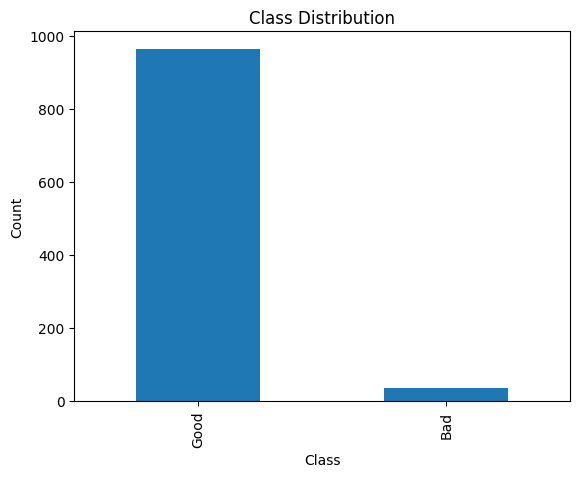

In [ ]:
credit['class'] = credit['class'].replace({'A201':0, 'A202':1})
credit['class'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Good', 'Bad'])
plt.show()

In [ ]:
# %% Split the data
X=credit.drop('class', axis=1)
y=credit['class']

In [ ]:
X.head()

checking_balance  months_loan_duration credit_history purpose  amount  \
0              A11                     6            A34     A43    1169   
1              A12                    48            A32     A43    5951   
2              A14                    12            A34     A46    2096   
3              A11                    42            A32     A42    7882   
4              A11                    24            A33     A40    4870   

  savings_balance employment_duration  installment_rate_income status_gender  \
0             A65                 A75                        4           A93   
1             A61                 A73                        2           A92   
2             A61                 A74                        2           A93   
3             A61                 A74                        2           A93   
4             A61                 A73                        3           A93   

  debtors_guarantors  residence_years property  age other_installment housing  \
0               A101                4     A121   67              A143    A152   
1               A101                2     A121   22              A143    A152   
2               A101                3     A121   49              A143    A152   
3               A103                4     A122   45              A143    A153   
4               A101                4     A124   53              A143    A153   

   existing_loans_count   job  dependents phone  
0                     2  A173           1  A192  
1                     1  A173           1  A191  
2                     1  A172           2  A191  
3                     1  A173           2  A191  
4                     2  A173           2  A191

In [ ]:
X.shape

(1000, 19)

In [ ]:
y.value_counts(dropna=False)

class
0    963
1     37
Name: count, dtype: int64

In [ ]:
# %% Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# %% Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# %% Preprocessing
# Define the categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

In [ ]:
y.value_counts()

class
A201    963
A202     37
Name: count, dtype: int64

## Appendix

In [ ]:
from sklearn.ensemble import IsolationForest

outliers = {'IQR': {}, 'Z-score': {}, 'IsolationForest': {}}
id_col = 'id' #¬†not 'id' this dataset
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# IQR (InterQuartile Range) method
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers['IQR'][col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index

# Z-score method
for col in numeric_cols:
    mean = data[col].mean()
    std = data[col].std()
    z_scores = (data[col] - mean) / std
    outliers['Z-score'][col] = data.index[np.abs(z_scores) > 3]

# Isolation Forest method
for col in numeric_cols:
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    preds = iso_forest.fit_predict(data[[col]])
    outliers_idx = data[[col]][preds == -1].index
    outliers['IsolationForest'][col] = outliers_idx

In [ ]:
import pandas as pd
from scipy.stats import ks_2samp

# Get total number of rows in the dataset
n_rows = data.shape[0]

# Step 1: Convert the outliers dictionary into a count DataFrame
outlier_counts = pd.DataFrame({
    method: {col: len(indices) for col, indices in cols.items()} 
    for method, cols in outliers.items()
})

# Step 2: Compute the percentage of outliers
outlier_percentages = outlier_counts.apply(lambda x: (x / n_rows) * 100)

# Step 3: Rename columns for clarity (add count and percentage labels)
outlier_counts.columns = [f"{col} (count)" for col in outlier_counts.columns]
outlier_percentages.columns = [f"{col} (%)" for col in outlier_percentages.columns]

# Step 4: Evaluate if removing outliers changes the distribution (KS test)
distribution_diffs = {}

for method, cols in outliers.items():
    diffs = {}
    for col, indices in cols.items():
        # Values with outliers
        with_outliers = data[col].dropna()
        # Values without outliers
        without_outliers = data.drop(index=indices)[col].dropna()

        # Apply Kolmogorov-Smirnov test
        ks_stat, p_value = ks_2samp(with_outliers, without_outliers)

        # Interpret result: significantly different or similar
        label = 'signif.different' if p_value < 0.05 else 'similar'
        diffs[col] = label

    # Create a Series for each method
    distribution_diffs[f"{method} (distrib. w or w/o)"] = pd.Series(diffs)

# Convert to DataFrame
distribution_diff_df = pd.DataFrame(distribution_diffs)

# Step 5: Combine all information into one final DataFrame
final_outlier_df = pd.concat([outlier_counts, outlier_percentages, distribution_diff_df], axis=1)

# Display the result
print(final_outlier_df.to_string())


                        IQR (count)  Z-score (count)  IsolationForest (count)  IQR (%)  Z-score (%)  IsolationForest (%) IQR (distrib. w or w/o) Z-score (distrib. w or w/o) IsolationForest (distrib. w or w/o)
duration                         70               14                       49      7.0          1.4                  4.9        signif.different                     similar                             similar
credit_amount                    72               25                       50      7.2          2.5                  5.0        signif.different                     similar                             similar
installment_commitment            0                0                        0      0.0          0.0                  0.0                 similar                     similar                             similar
residence_since                   0                0                        0      0.0          0.0                  0.0                 similar                    